# Insurance Cost Prediction: An End-to-End Regression Project
### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
  
## Problem statement
This project analyzes how demographic and lifestyle factors such as age, BMI, smoking status, number of children, and region influence medical insurance charges, and builds a regression model to predict insurance costs.

## Data Collection
* Dataset Source - https://www.kaggle.com/datasets/mirichoi0218/insurance
* The data consists of 7 column and 1338 rows.

# Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Import Data

In [2]:
df = pd.read_csv('insurance.csv')

# Exploratory data analysis

In [3]:
# Show Top 5 Records 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Shape of the dataset 
df.shape

(1338, 7)

In [5]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Check Missing values 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Check Duplicates 
df.duplicated().sum()

np.int64(1)

* Data set has no missing values
* but has one duplicate entry

In [8]:
# Checking the number of unique values of each column 
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


* numerical data - 'age', 'bmi', 'children', 'charges'
* categorical data - 'sex', 'smoker','region'

In [9]:
# Check statistics of data set 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* fairly symmetric age distribution.
* large spread indicates BMI is likely a strong predictor of insurance charges.
* Children count has low impact variability compared to other features.
* Charges are highly skewed, likely due to factors such as smoking or high BMI.

In [10]:
# checking all columns 
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Exploring Data ( Visualization )

# Hist plot 
Used to visualize the distribution of numerical data and see how values are spread. 

You can see:
* skewness
* peaks
* spread
* gaps
* overall shape of data

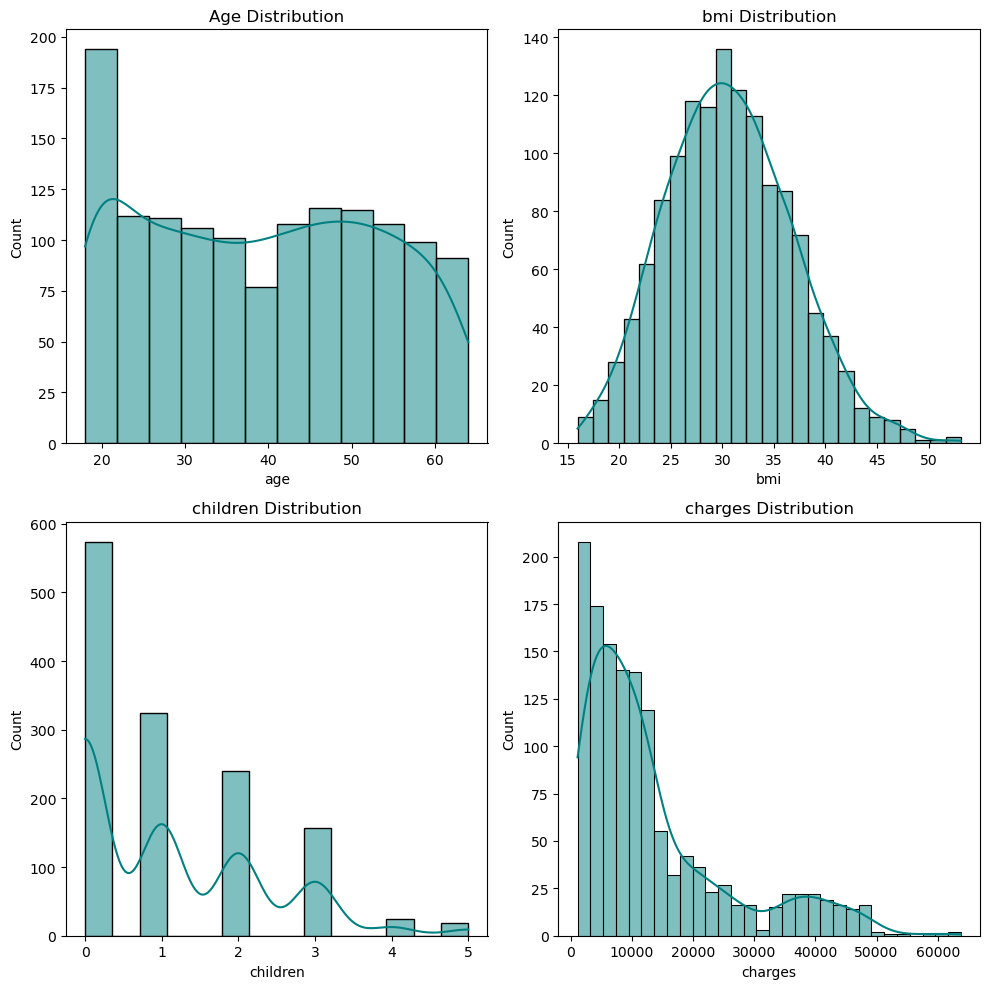

In [11]:
# Histogram & KDE for numerical data 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Age
sns.histplot(data=df, x='age', kde=True, color='teal', ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")

# bmi
sns.histplot(data=df, x='bmi', kde=True, color='teal', ax=axes[0, 1])
axes[0, 1].set_title("bmi Distribution")

# children
sns.histplot(data=df, x='children', kde=True, color='teal', ax=axes[1, 0])
axes[1, 0].set_title("children Distribution")

# charges
sns.histplot(data=df, x='charges', kde=True, color='teal', ax=axes[1, 1])
axes[1, 1].set_title("charges Distribution")

plt.tight_layout()
plt.show()

* Age shows balanced representation across adult age groups.
* bmi shows most individuals clustered between 25–35.
* Children shows majority of individuals having 0–2 children.
* Charges shows most individuals incurring lower costs.

# Count plot
Used to show frequency counts of each category in categorical features.

Countplots show how many observations fall into each category.

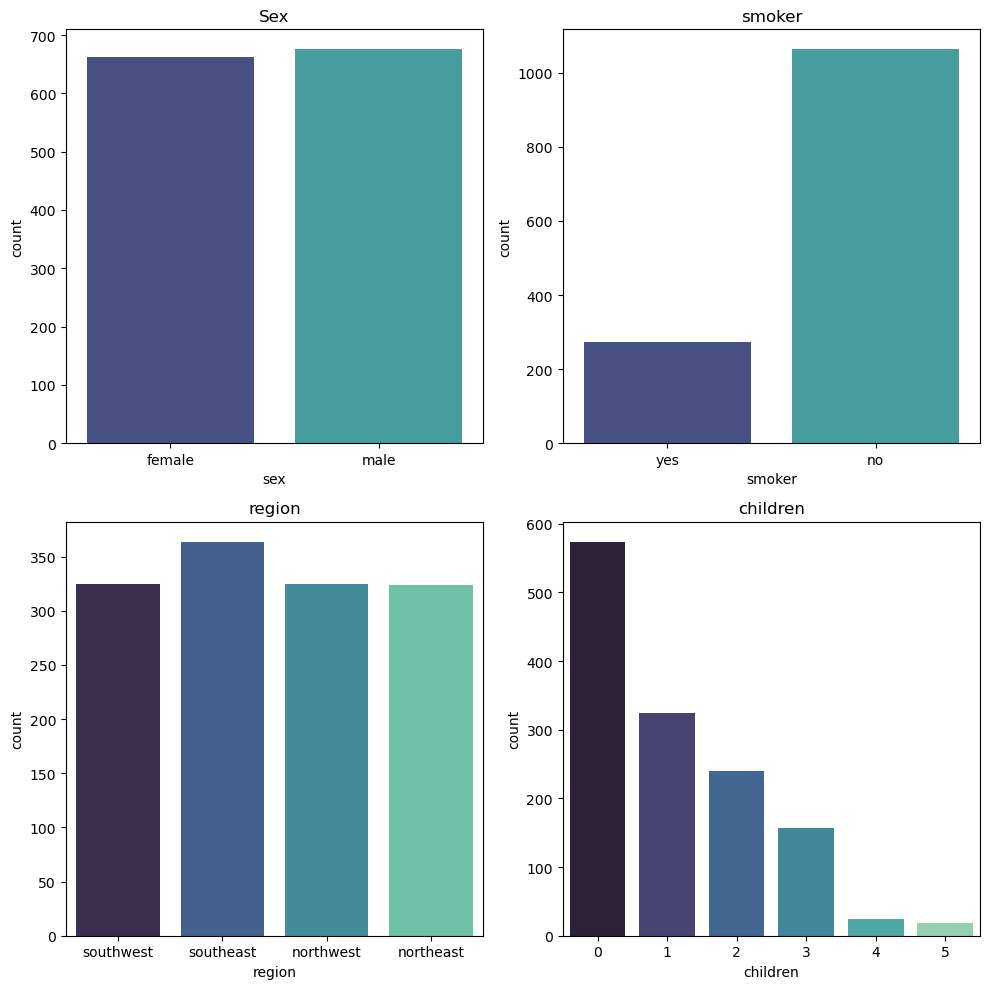

In [12]:
# count plot for categorical data 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot 1: Sex
sns.countplot(x=df['sex'], ax=axes[0, 0], palette='mako')
axes[0, 0].set_title("Sex")

# Plot 2: smoker
sns.countplot(x=df['smoker'], ax=axes[0, 1], palette='mako')
axes[0, 1].set_title("smoker")

# Plot 3: region
sns.countplot(x=df['region'], ax=axes[1, 0], palette='mako')
axes[1, 0].set_title("region")

# Plot 4: children
sns.countplot(x=df['children'], ax=axes[1, 1], palette='mako')
axes[1, 1].set_title("children")

plt.tight_layout()
plt.show()

* balanced distribution of male and female policyholders.
* Non-smokers significantly outnumber smokers
* Policyholders are fairly evenly distributed across all regions
* majority of individuals having 0–2 children.

# Box plots
used to understand the distribution of numerical data and to compare it across categories.

* show distribution using 5 summary statistics
* detecting outliers
* To compare two groups

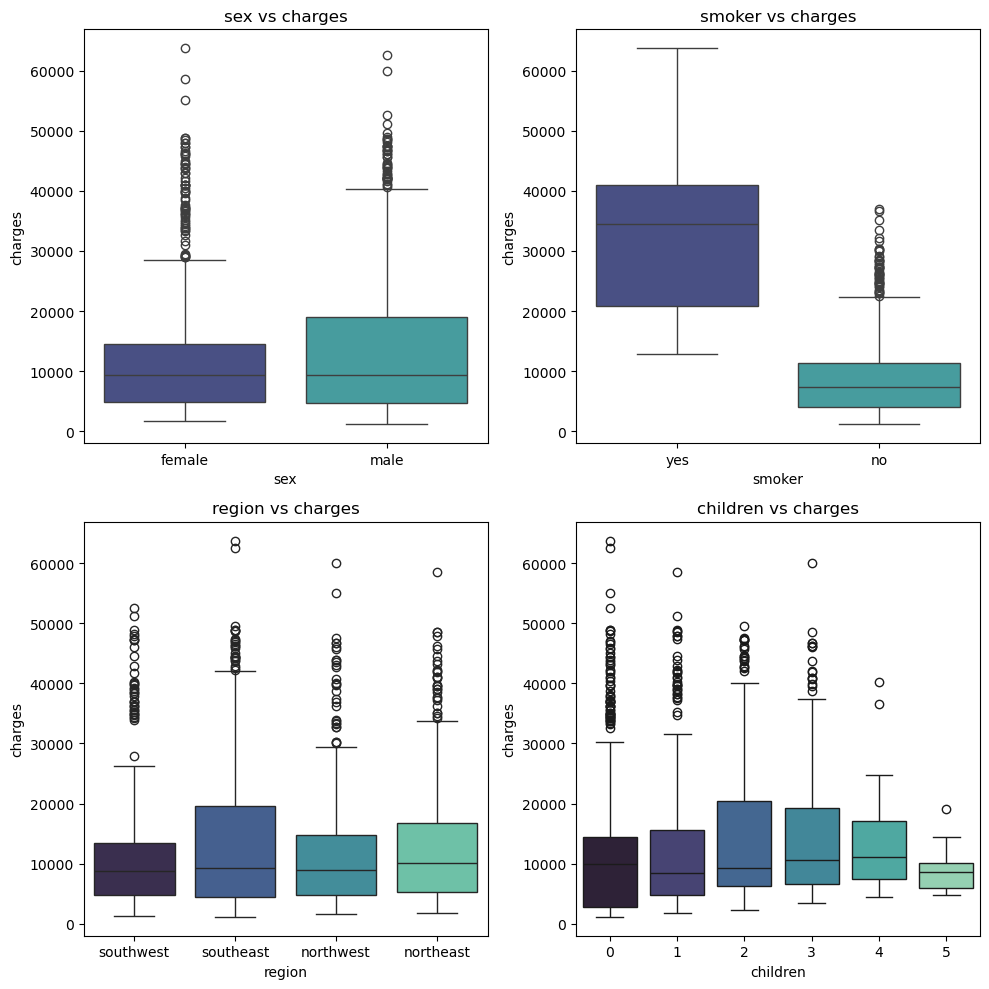

In [13]:
# box plot to check categorical data vs target(contineous data)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# 1. sex
sns.boxplot(x='sex', y='charges', data=df, ax=axes[0, 0], palette='mako')
axes[0, 0].set_title("sex vs charges")

# 2. smoker
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0, 1], palette='mako')
axes[0, 1].set_title("smoker vs charges")

# 3. region
sns.boxplot(x='region', y='charges', data=df, ax=axes[1, 0], palette='mako')
axes[1, 0].set_title("region vs charges")

# 4. children
sns.boxplot(x='children', y='charges', data=df, ax=axes[1, 1], palette='mako')
axes[1, 1].set_title("children vs charges")


plt.tight_layout()
plt.show()

* males exhibit slightly higher risk costs in some cases.
* Smokers have significantly higher median charges compared to non-smokers.
* region has minimal impact on insurance costs
* Insurance charges increase slightly with the number of children

# Scatter + Regression Line
Scatter with regression lines helps identify trend strength, linearity, and outliers between features and the target variable.

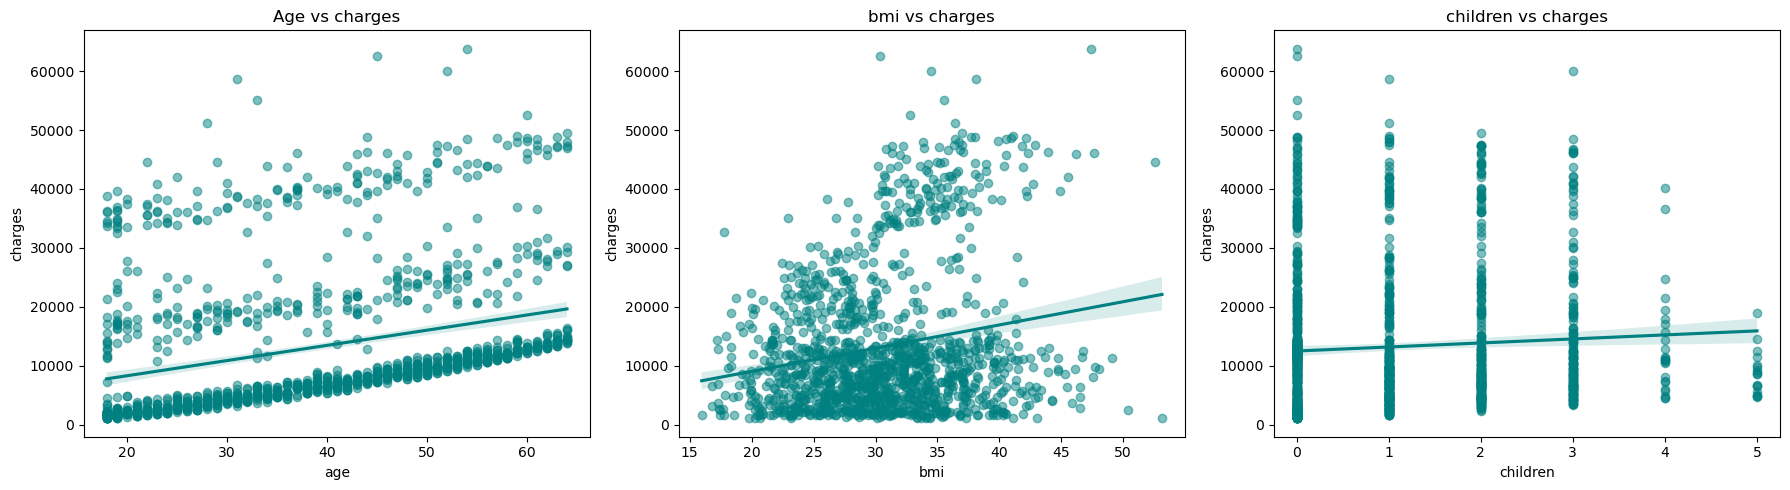

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age
sns.regplot(data=df, x='age', y='charges', color='teal', scatter_kws={'alpha':0.5}, ax=axes[0])
axes[0].set_title("Age vs charges")

# bmi
sns.regplot(data=df, x='bmi', y='charges', color='teal', scatter_kws={'alpha':0.5}, ax=axes[1])
axes[1].set_title("bmi vs charges")

# children
sns.regplot(data=df, x='children', y='charges', color='teal', scatter_kws={'alpha':0.5}, ax=axes[2])
axes[2].set_title("children vs charges")

plt.tight_layout()
plt.show()

* Insurance charges increase with age, showing a clear positive trend.
* Higher BMI values are associated with higher charges, especially for obese individuals.
* Number of children has a weak relationship with charges.

# Heat map
A heatmap is used to visualize correlations between numerical features, helping identify important relationships, multicollinearity, and patterns that guide feature selection for modeling.

<Axes: >

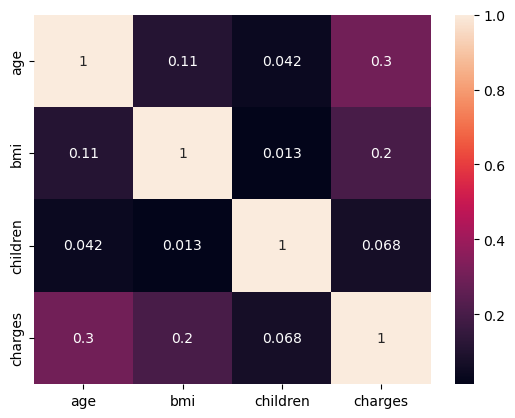

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

* age and bmi has has a moderate positive correlation with charges.
* Children shows a weak correlation with charges

# Data Cleaning

In [16]:
df_cleaned = df.copy()

In [17]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
# dropping the duplicate 
df_cleaned.drop_duplicates(inplace=True)

In [19]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data preprocessing

In [20]:
df_encoded = df_cleaned.copy()

In [21]:
df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# label encoding

In [22]:
df_encoded['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [23]:
df_encoded['sex'] = df_encoded['sex'].map({"male" : 0, "female" : 1})

In [24]:
df_encoded['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [25]:
df_encoded['smoker'] = df_encoded['smoker'].map({"no" : 0, "yes" : 1})

# Feature engineering 

* Create Age Groups (Binning Age) 
* Create bmi catogory (Binning bmi)
* Interaction feature: bmi × smoker

In [26]:
df_encoded['bmi_category'] = pd.cut(df_encoded['bmi'],
                            bins=[0,18.5, 24.9, 29.9, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [27]:
df_encoded['AgeGroup'] = pd.cut(df_encoded['age'],
                        bins=[17, 30, 45, 65],
                        labels=['Young', 'Middle-aged', 'Senior'])

In [28]:
df_encoded['bmi_smoker_numeric'] = df_encoded['bmi'] * df_encoded['smoker']

In [29]:
df_encoded.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category', 'AgeGroup', 'bmi_smoker_numeric'],
      dtype='object')

In [30]:
df_encoded.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,AgeGroup,bmi_smoker_numeric
0,19,1,27.900,0,1,southwest,16884.92400,Overweight,Young,27.9
1,18,0,33.770,1,0,southeast,1725.55230,Obese,Young,0.0
2,28,0,33.000,3,0,southeast,4449.46200,Obese,Young,0.0
3,33,0,22.705,0,0,northwest,21984.47061,Normal,Middle-aged,0.0
4,32,0,28.880,0,0,northwest,3866.85520,Overweight,Middle-aged,0.0


# One-Hot Encoding

In [31]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

In [32]:
df_encoded =  df_encoded.astype(int)

In [33]:
df_encoded.head()

,age,sex,bmi,children,smoker,charges,bmi_smoker_numeric,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,AgeGroup_Middle-aged,AgeGroup_Senior
0,19,1,27,0,1,16884,27,0,0,1,0,1,0,0,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,1,0,0
2,28,0,33,3,0,4449,0,0,1,0,0,0,1,0,0
3,33,0,22,0,0,21984,0,1,0,0,1,0,0,1,0
4,32,0,28,0,0,3866,0,1,0,0,0,1,0,1,0


# Feature selection

In [34]:
df_encoded.corr(numeric_only=True)['charges'].sort_values(ascending=False)

charges                    1.000000
bmi_smoker_numeric         0.845721
smoker                     0.787234
age                        0.298309
AgeGroup_Senior            0.250356
bmi_category_Obese         0.197660
bmi                        0.196236
region_southeast           0.073577
children                   0.067390
AgeGroup_Middle-aged      -0.033727
region_northwest          -0.038695
region_southwest          -0.043637
sex                       -0.058046
bmi_category_Normal       -0.105656
bmi_category_Overweight   -0.118280
Name: charges, dtype: float64

In [35]:
final_df = df_encoded[['age', 'sex', 'bmi', 'children', 'smoker', 'charges','bmi_smoker_numeric', 'region_southeast', 
          'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese', 'AgeGroup_Senior']]

* features showing satisfactory correlation with the target are selected

In [36]:
final_df.head()

,age,sex,bmi,children,smoker,charges,bmi_smoker_numeric,region_southeast,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,AgeGroup_Senior
0,19,1,27,0,1,16884,27,0,0,1,0,0
1,18,0,33,1,0,1725,0,1,0,0,1,0
2,28,0,33,3,0,4449,0,1,0,0,1,0
3,33,0,22,0,0,21984,0,0,1,0,0,0
4,32,0,28,0,0,3866,0,0,0,1,0,0


In [37]:
final_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'bmi_smoker_numeric', 'region_southeast', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese', 'AgeGroup_Senior'],
      dtype='object')

# Train test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#Separate features and target 
X = final_df.drop('charges', axis = 1)
y = final_df['charges']

In [40]:
#Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Testing

In [43]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

In [44]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
}

In [45]:
# Train models and evaluate
results = []

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    # Predict on test set
    y_pred= model.predict(X_test_scaled)
    # Evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        'Model': name,
        'R2_score': r2,
        'RMSE': rmse
    })
     # Print each model's results
    print("----------------------------------")
    print(f"Model: {name}")
    print(f"R2_score: {round(r2,4)}")
    print(f"RMSE: {round(rmse,4)}")
    print("----------------------------------\n")

----------------------------------
Model: Linear Regression
R2_score: 0.8828
RMSE: 4640.0882
----------------------------------

----------------------------------
Model: Random Forest
R2_score: 0.8684
RMSE: 4917.9257
----------------------------------

----------------------------------
Model: XGBoost
R2_score: 0.8821
RMSE: 4654.1274
----------------------------------



In [46]:
# Display results
results_df = pd.DataFrame(results).sort_values(by='R2_score', ascending=False).reset_index(drop=True)
results_df

,Model,R2_score,RMSE
0,Linear Regression,0.882832,4640.088226
1,XGBoost,0.882121,4654.127416
2,Random Forest,0.868380,4917.925700


# Hyperparameter tuning with GridSearchCV for Random Forest and XGBoost

In [47]:
from sklearn.model_selection import GridSearchCV 

models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': xgb.XGBRegressor(
            objective='reg:squarederror',
            random_state=42
        ),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.9, 1.0]
        }
    }
}

# Perform GridSearchCV
results = []

for name, mp in models.items():
    print(f"\nTraining {name} with GridSearchCV...")

    grid = GridSearchCV(
        estimator=mp['model'],      # model object
        param_grid=mp['params'],    # correct params
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)     # consistent target

    # Best estimator
    best_model = grid.best_estimator_

    # Predict
    y_pred = best_model.predict(X_test)

    # Evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'Best_Params': grid.best_params_,
        'R2_score': r2,
        'RMSE': rmse
    })

    print("----------------------------------")
    print(f"Model: {name}")
    print(f"Best Params: {grid.best_params_}")
    print(f"R2_score: {round(r2, 4)}")
    print(f"RMSE: {round(rmse, 2)}")
    print("----------------------------------\n")



Training Random Forest with GridSearchCV...
----------------------------------
Model: Random Forest
Best Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
R2_score: 0.8974
RMSE: 4341.33
----------------------------------


Training XGBoost with GridSearchCV...
----------------------------------
Model: XGBoost
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
R2_score: 0.9001
RMSE: 4285.52
----------------------------------



# Selecting the  best model with best parameters

In [48]:
from sklearn.model_selection import cross_val_score 

model = xgb.XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9, 
                         objective='reg:squarederror', random_state=42) 
cv_r2_scores = cross_val_score(model,X_train,y_train,cv=5,scoring='r2',n_jobs=-1)
print(cv_r2_scores)

model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
r2 = r2_score(y_test, y_pred)
r2 

[0.80677998 0.87101007 0.83760726 0.85713834 0.85726446]


0.900053858757019

# Plot y_pred and y_test for selected model

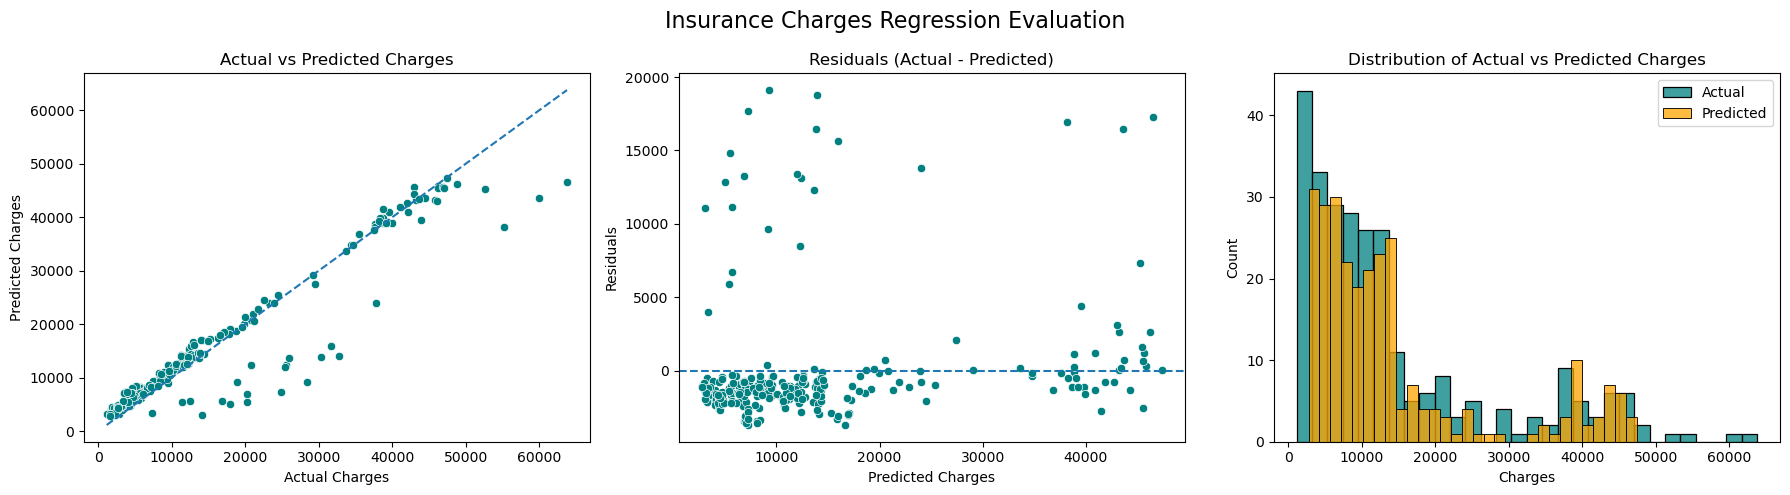

In [49]:
residuals = y_test - y_pred 
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Insurance Charges Regression Evaluation", fontsize=16) 

#Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred, color='teal', ax=axes[0])

axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--')

axes[0].set_title("Actual vs Predicted Charges")
axes[0].set_xlabel("Actual Charges")
axes[0].set_ylabel("Predicted Charges")

# Residuals Plot
sns.scatterplot(x=y_pred, y=residuals, color='teal', ax=axes[1])

axes[1].axhline(0, linestyle='--')
axes[1].set_title("Residuals (Actual - Predicted)")
axes[1].set_xlabel("Predicted Charges")
axes[1].set_ylabel("Residuals")

# Distribution of Actual vs Predicted
sns.histplot(y_test, bins=30, color='teal', label="Actual", ax=axes[2])
sns.histplot(y_pred, bins=30, color='orange', label="Predicted", ax=axes[2])

axes[2].set_title("Distribution of Actual vs Predicted Charges")
axes[2].set_xlabel("Charges")
axes[2].legend()

plt.tight_layout()
plt.show()

* The tight clustering around the diagonal indicates strong predictive accuracy, which aligns with the high R² score of ~90%.
* The residuals are evenly distributed around zero, suggesting the model generalizes well without strong bias.
* Predicted distribution closely overlaps actual distribution

# Difference between Actual and Predicted Values

In [50]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
900,8688,10551.177734,-1863.177734
1064,5708,8282.691406,-2574.691406
1256,11436,12261.605469,-825.605469
298,38746,38873.343750,-127.343750
237,4463,6511.551758,-2048.551758
...,...,...,...
534,13831,14322.488281,-491.488281
542,13887,14557.101562,-670.101562
760,3925,7247.267578,-3322.267578
1284,47403,47394.535156,8.464844


# Saving best model

In [51]:
import joblib
joblib.dump(model, "insurance_xgb_model.pkl")
joblib.dump(X.columns.tolist(),"insurance_columns.pkl")

['insurance_columns.pkl']